## Fifa world cup EDA

In [2]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.patches as patches

In [30]:
url = "C:/python/Fifa_world_cup_matches.csv"
df = pd.read_csv(url)
df

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10 DEC 2022,20 : 00,Quarter-final,...,1,0,9,15,0,0,49,54,193,308
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,...,0,0,13,14,0,0,72,47,328,218
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17 DEC 2022,16 : 00,Play-off for third place,...,0,0,7,14,0,0,75,72,288,277


In [31]:
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [33]:
# only the numerical data
df.describe()

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,1.468750,0.984375,0.093750,0.109375,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,1.563155,0.999876,0.293785,0.314576,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,7.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


In [34]:
# checking the null cols
df.isnull().sum()

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

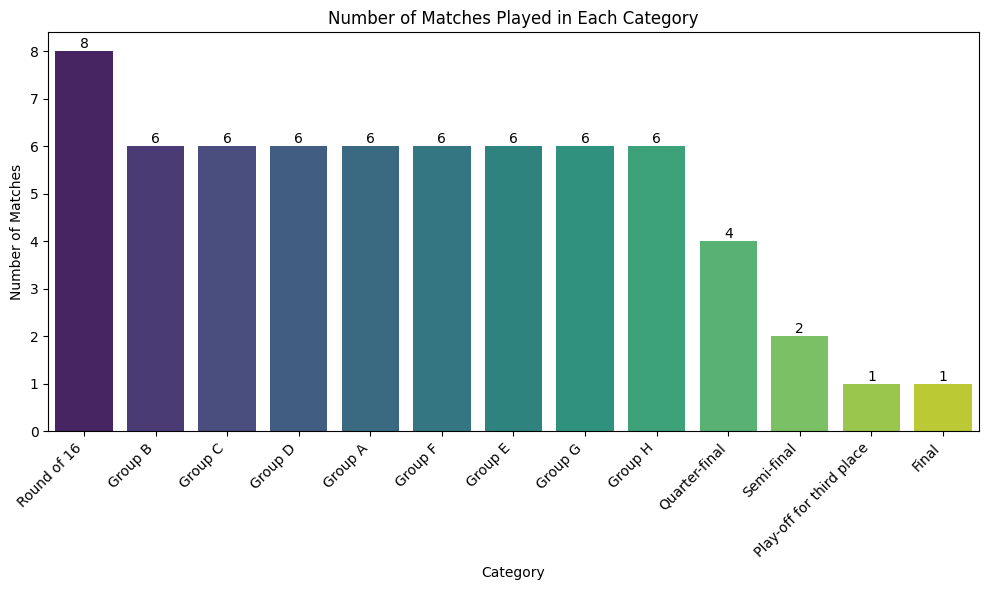

                    Category  Number of Matches
0                Round of 16                  8
1                    Group B                  6
2                    Group C                  6
3                    Group D                  6
4                    Group A                  6
5                    Group F                  6
6                    Group E                  6
7                    Group G                  6
8                    Group H                  6
9              Quarter-final                  4
10                Semi-final                  2
11  Play-off for third place                  1
12                     Final                  1


In [35]:
# count of matches per each category
matches_per_category = df['category'].value_counts().reset_index()
matches_per_category.columns = ['Category', 'Number of Matches']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Category', y='Number of Matches', data=matches_per_category, palette='viridis', hue='Category', legend=False)
plt.title('Number of Matches Played in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')

for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

print(matches_per_category)

In [36]:
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [37]:
# conditional statement for the most winning team
team_wins = {}

for index, row in df.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    goals1 = row['number of goals team1']
    goals2 = row['number of goals team2']
    penalties1 = row['penalties scored team1']
    penalties2 = row['penalties scored team2']

    if team1 not in team_wins:
        team_wins[team1] = 0
    if team2 not in team_wins:
        team_wins[team2] = 0

    if goals1 > goals2:
        team_wins[team1] += 1
    elif goals2 > goals1:
        team_wins[team2] += 1
    else:
        if penalties1 > penalties2:
            team_wins[team1] += 1
        elif penalties2 > penalties1:
            team_wins[team2] += 1

win_counts_series = pd.Series(team_wins)

most_winning_team = win_counts_series.idxmax()
max_wins = win_counts_series.max()

print(f"The most winning team is '{most_winning_team}' with {max_wins} wins (including penalty shootout victories).")

The most winning team is 'FRANCE' with 6 wins (including penalty shootout victories).


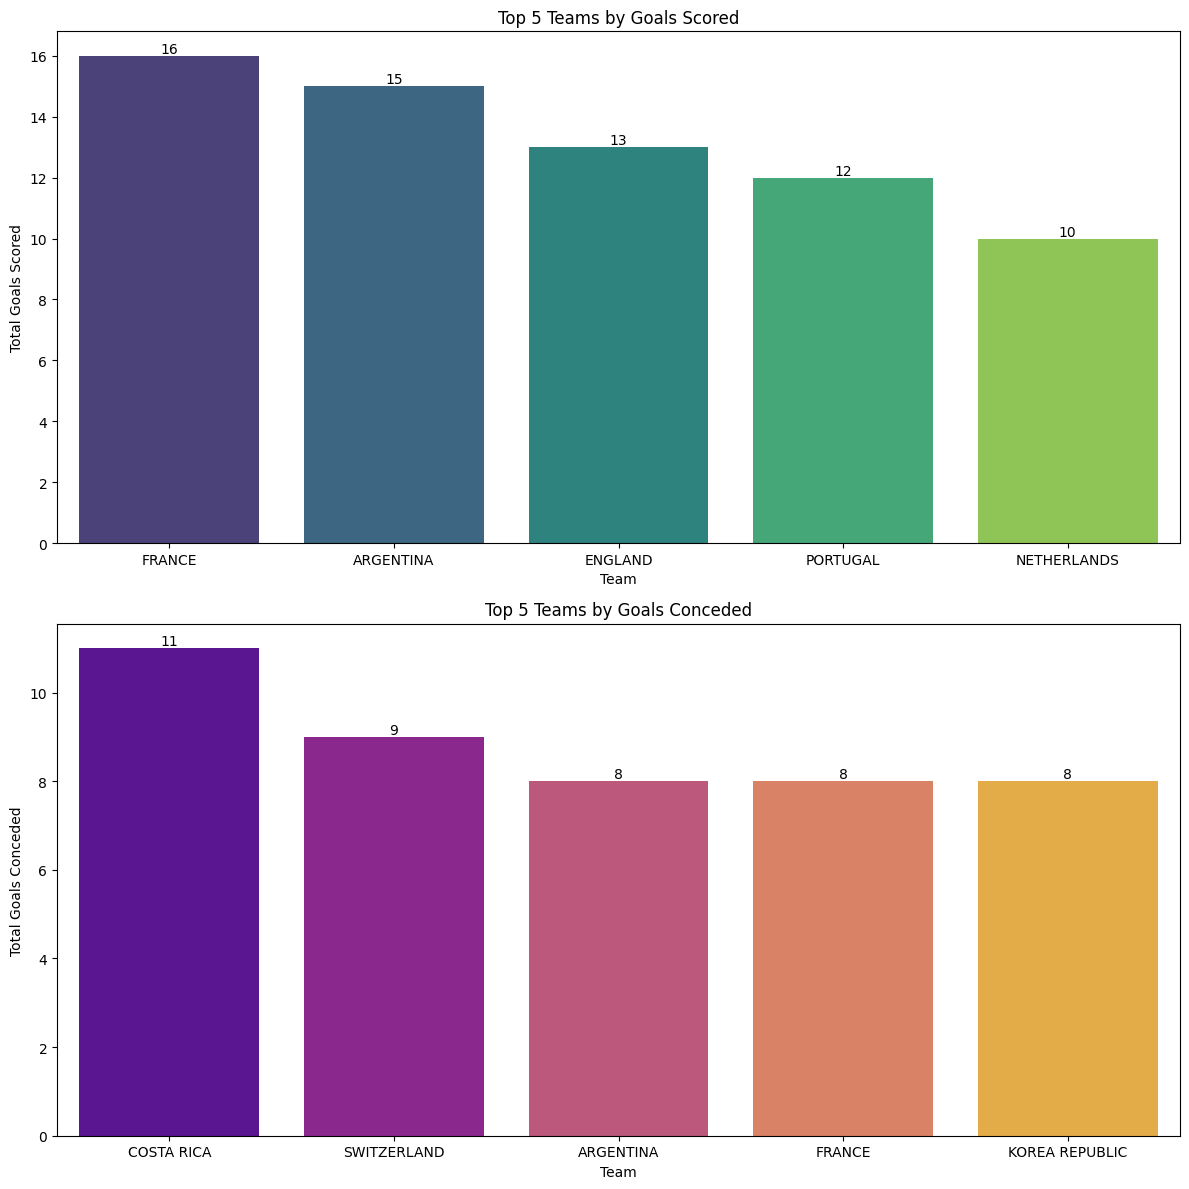


Top 5 Teams by Goals Scored:
FRANCE         16
ARGENTINA      15
ENGLAND        13
PORTUGAL       12
NETHERLANDS    10
dtype: int64

Top 5 Teams by Goals Conceded:
COSTA RICA        11
SWITZERLAND        9
ARGENTINA          8
FRANCE             8
KOREA REPUBLIC     8
dtype: int64


In [38]:
# bar chart for top 5 teams by goals scored/conceded 
team_goals_scored = {}
team_goals_conceded = {}

for index, row in df.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    goals_team1 = row['number of goals team1']
    goals_team2 = row['number of goals team2']
    conceded_team1 = row['conceded team1']
    conceded_team2 = row['conceded team2']

    team_goals_scored[team1] = team_goals_scored.get(team1, 0) + goals_team1
    team_goals_scored[team2] = team_goals_scored.get(team2, 0) + goals_team2

    team_goals_conceded[team1] = team_goals_conceded.get(team1, 0) + conceded_team1
    team_goals_conceded[team2] = team_goals_conceded.get(team2, 0) + conceded_team2

goals_scored_series = pd.Series(team_goals_scored)
goals_conceded_series = pd.Series(team_goals_conceded)

top_5_scored = goals_scored_series.nlargest(5)
top_5_conceded = goals_conceded_series.nlargest(5)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4)

barplot_scored = sns.barplot(x=top_5_scored.index, y=top_5_scored.values, palette='viridis', hue=top_5_scored.index, ax=axes[0])
axes[0].set_title('Top 5 Teams by Goals Scored')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Total Goals Scored')
for container in barplot_scored.containers:
    barplot_scored.bar_label(container, fmt='%d', label_type='edge')

barplot_conceded = sns.barplot(x=top_5_conceded.index, y=top_5_conceded.values, palette='plasma', hue=top_5_conceded.index, ax=axes[1])
axes[1].set_title('Top 5 Teams by Goals Conceded')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Total Goals Conceded')
for container in barplot_conceded.containers:
    barplot_conceded.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

print("\nTop 5 Teams by Goals Scored:")
print(top_5_scored)

print("\nTop 5 Teams by Goals Conceded:")
print(top_5_conceded)

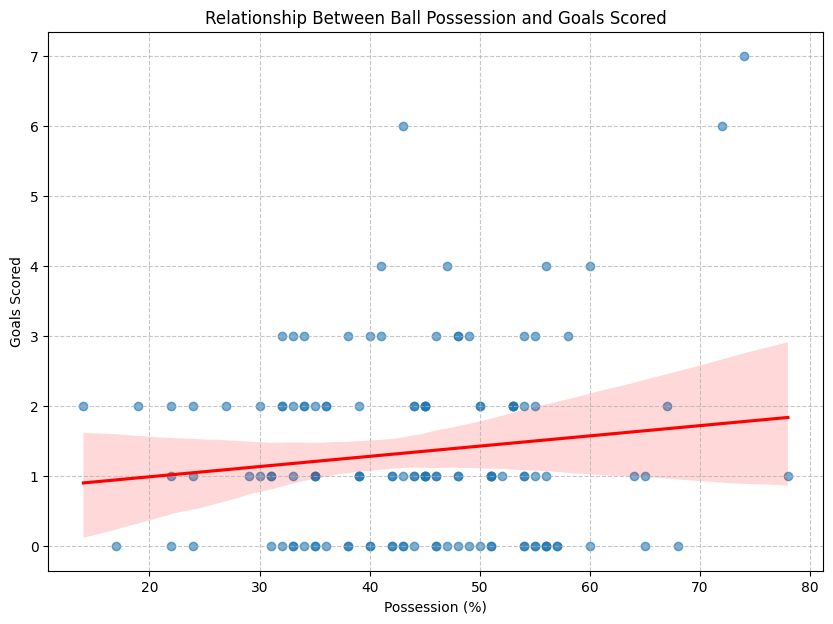

The correlation coefficient between possession and goals scored is: 0.13


In [39]:
# regression Plot for the corr between the ball possession and goals scored
df['possession team1_numeric'] = df['possession team1'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)
df['possession team2_numeric'] = df['possession team2'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

possession_goals_df = pd.DataFrame({
    'possession': pd.concat([df['possession team1_numeric'], df['possession team2_numeric']]),
    'goals': pd.concat([df['number of goals team1'], df['number of goals team2']])
})

plt.figure(figsize=(10, 7))
sns.regplot(x='possession', y='goals', data=possession_goals_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship Between Ball Possession and Goals Scored')
plt.xlabel('Possession (%)')
plt.ylabel('Goals Scored')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

correlation = possession_goals_df['possession'].corr(possession_goals_df['goals'])
print(f"The correlation coefficient between possession and goals scored is: {correlation:.2f}")

In [40]:
df

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,possession team1_numeric,possession team2_numeric
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,6,5,0,0,52,72,256,279,42.0,50.0
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,8,13,0,0,63,72,139,416,72.0,19.0
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,9,15,0,0,63,73,263,251,44.0,45.0
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,7,7,0,0,81,72,242,292,51.0,39.0
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,4,14,0,0,65,80,163,361,64.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10 DEC 2022,20 : 00,Quarter-final,...,9,15,0,0,49,54,193,308,54.0,36.0
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,12,10,0,0,85,63,321,260,34.0,54.0
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,...,13,14,0,0,72,47,328,218,34.0,55.0
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17 DEC 2022,16 : 00,Play-off for third place,...,7,14,0,0,75,72,288,277,45.0,45.0


In [41]:
# total goals from inside/outside penalty area 
total_goals_inside_penalty_area = df['goal inside the penalty area team1'].sum() + \
                                  df['goal inside the penalty area team2'].sum()

total_goals_outside_penalty_area = df['goal outside the penalty area team1'].sum() + \
                                   df['goal outside the penalty area team2'].sum()

print("Total Goals from Inside Penalty Area:", total_goals_inside_penalty_area)
print("Total Goals from Outside Penalty Area:", total_goals_outside_penalty_area)

Total Goals from Inside Penalty Area: 157
Total Goals from Outside Penalty Area: 13


In [42]:
# morocco matches
morocco_matches = df[(df['team1'] == 'MOROCCO') | (df['team2'] == 'MOROCCO')]

print("All Matches Played by Morocco:")
print("-" * 40)

for index, row in morocco_matches.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    goals1 = row['number of goals team1']
    goals2 = row['number of goals team2']
    penalties1 = row['penalties scored team1']
    penalties2 = row['penalties scored team2']
    category = row['category']
    match_date = row['date']

    if team1 == 'MOROCCO':
        opponent = team2
        morocco_score = goals1
        opponent_score = goals2
        morocco_penalties = penalties1
        opponent_penalties = penalties2
    else: 
        opponent = team1
        morocco_score = goals2
        opponent_score = goals1
        morocco_penalties = penalties2
        opponent_penalties = penalties1

    score_line = f"{morocco_score}-{opponent_score}"
    if morocco_penalties > 0 or opponent_penalties > 0:
        score_line += f" ({morocco_penalties}-{opponent_penalties} pen.)"

    print(f"Date: {match_date}, Category: {category}")
    print(f"Morocco vs. {opponent}: {score_line}")
    print("-" * 40)

All Matches Played by Morocco:
----------------------------------------
Date: 23 NOV 2022, Category: Group F
Morocco vs. CROATIA: 0-0
----------------------------------------
Date: 27 NOV 2022, Category: Group F
Morocco vs. BELGIUM: 2-0
----------------------------------------
Date: 01 DEC 2022, Category: Group F
Morocco vs. CANADA: 2-1
----------------------------------------
Date: 06 DEC 2022, Category: Round of 16
Morocco vs. SPAIN: 0-0
----------------------------------------
Date: 10 DEC 2022, Category: Quarter-final
Morocco vs. PORTUGAL: 1-0
----------------------------------------
Date: 14 DEC 2022, Category: Semi-final
Morocco vs. FRANCE: 0-2
----------------------------------------
Date: 17 DEC 2022, Category: Play-off for third place
Morocco vs. CROATIA: 1-2
----------------------------------------


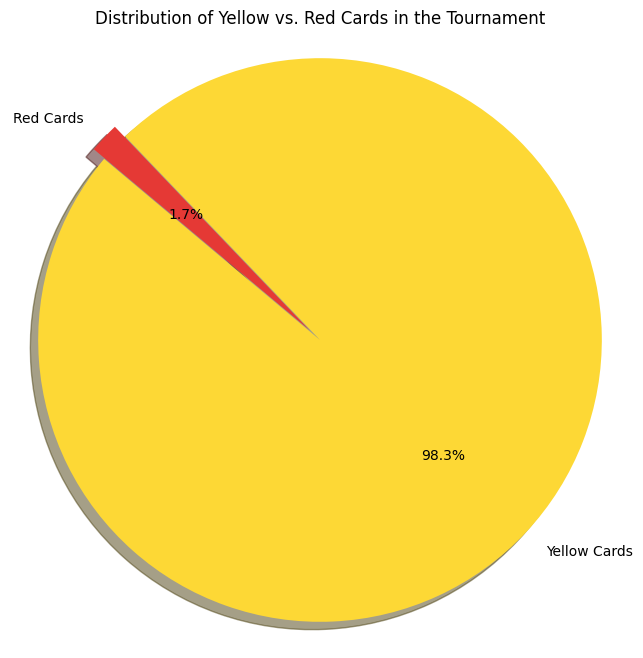


Total Yellow Cards: 226
Total Red Cards: 4


In [43]:
# pie chate for red and yellow cards %
total_yellow_cards = df['yellow cards team1'].sum() + \
                     df['yellow cards team2'].sum()

total_red_cards = df['red cards team1'].sum() + \
                  df['red cards team2'].sum()

card_types = {
    'Yellow Cards': total_yellow_cards,
    'Red Cards': total_red_cards
}

labels = card_types.keys()
sizes = card_types.values()
colors = ['#fdd835', '#e53935']
explode = (0.05, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Yellow vs. Red Cards in the Tournament')
plt.axis('equal') 
plt.show()

print("\nTotal Yellow Cards:", total_yellow_cards)
print("Total Red Cards:", total_red_cards)

In [44]:
df

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,possession team1_numeric,possession team2_numeric
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,6,5,0,0,52,72,256,279,42.0,50.0
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,8,13,0,0,63,72,139,416,72.0,19.0
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,9,15,0,0,63,73,263,251,44.0,45.0
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,7,7,0,0,81,72,242,292,51.0,39.0
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,4,14,0,0,65,80,163,361,64.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10 DEC 2022,20 : 00,Quarter-final,...,9,15,0,0,49,54,193,308,54.0,36.0
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,12,10,0,0,85,63,321,260,34.0,54.0
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,...,13,14,0,0,72,47,328,218,34.0,55.0
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17 DEC 2022,16 : 00,Play-off for third place,...,7,14,0,0,75,72,288,277,45.0,45.0


In [45]:
# top 3 teams with highest avg possession:

possession_data = []

for index, row in df.iterrows():
    possession1 = float(row['possession team1'].replace('%', '').replace(',', '.'))
    possession2 = float(row['possession team2'].replace('%', '').replace(',', '.'))

    possession_data.append({'team': row['team1'], 'possession': possession1})
    possession_data.append({'team': row['team2'], 'possession': possession2})

team_possession_df = pd.DataFrame(possession_data)

average_possession = team_possession_df.groupby('team')['possession'].mean()

top_3_possession = average_possession.nlargest(3)

print("Top 3 Teams with Highest Average Possession:")
print("-" * 40)
for team, avg_possession in top_3_possession.items():
    print(f"{team}: {avg_possession:.2f}%")

Top 3 Teams with Highest Average Possession:
----------------------------------------
SPAIN: 69.00%
ENGLAND: 57.80%
PORTUGAL: 54.20%


In [46]:
# map for the asian teams who participated in the tournament 2022
asian_teams = {
    'Australia': (-25.2744, 133.7751), 
    'Iran': (32.4279, 53.6880),
    'Japan': (36.2048, 138.2529),
    'Korea Republic': (35.9078, 127.7669),
    'Qatar': (25.3548, 51.1839),
    'Saudi Arabia': (24.7136, 46.6753),
}

asia_map = folium.Map(location=[20, 100], zoom_start=4)

for team, coordinates in asian_teams.items():
    folium.Marker(
        location=coordinates,
        popup=team,
        icon=folium.Icon(color='blue')  
    ).add_to(asia_map)

asia_map.save("asian_teams_world_cup_2022.html")

print("Map generated successfully! Open 'asian_teams_world_cup_2022.html' in your browser.")

Map generated successfully! Open 'asian_teams_world_cup_2022.html' in your browser.


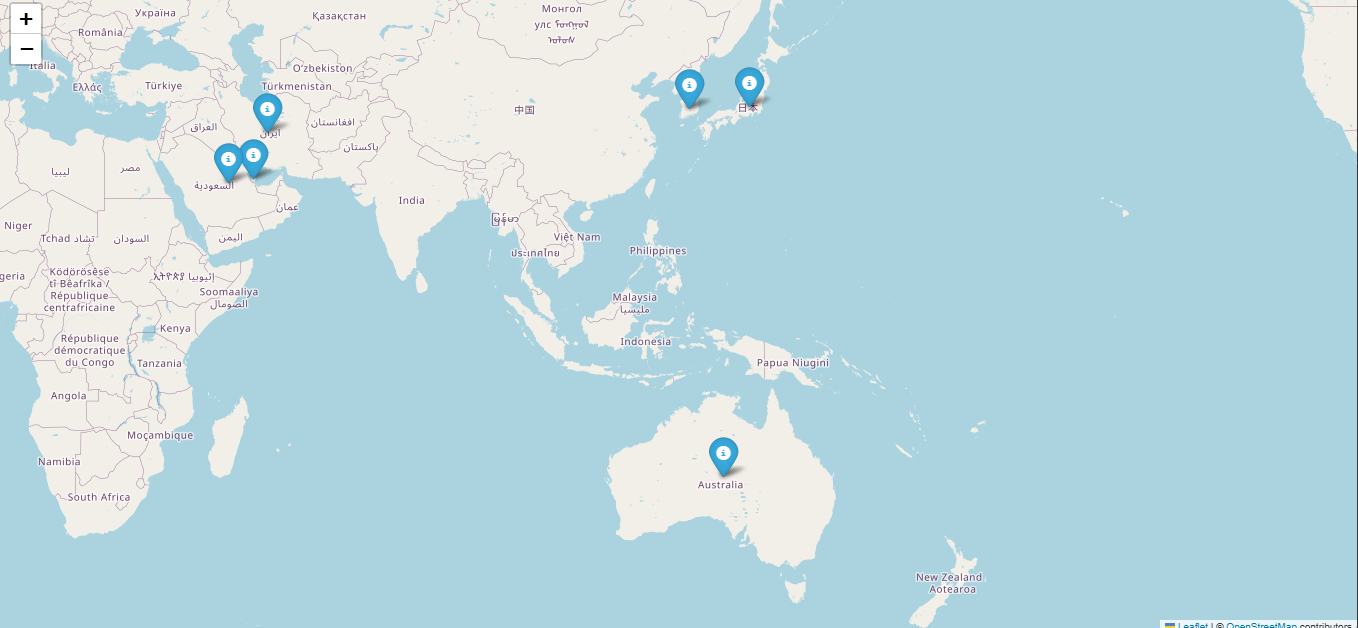

In [48]:
from IPython.display import Image, display


image_path = "C:\\Users\\HP EliteBook 445 G8\\OneDrive - Asia Pacific University of Technology And Innovation (APU)\\Pictures\\Screenshots\\Screenshot 2025-05-19 053917.png"

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: The image file was not found at '{image_path}'.")
    print("Please ensure the file path is correct and the image exists at that location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

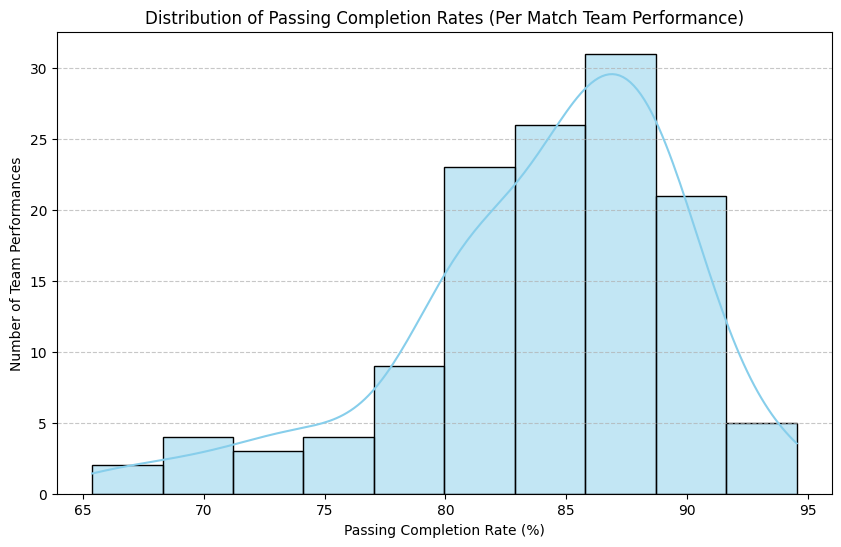


Descriptive Statistics for Passing Completion Rates:
count    12800.000000
mean        84.107408
std          5.746790
min         65.384615
25%         81.168749
50%         85.182292
75%         88.159766
max         94.533459
dtype: float64


In [49]:
# distribution of passing completion rates 
passing_rates = []

for index, row in df.iterrows():
    # Team 1
    total_passes1 = row['passes team1']
    completed_passes1 = row['passes completed team1']
    if total_passes1 > 0:
        passing_rates.append(completed_passes1 / total_passes1)
    else:
        passing_rates.append(np.nan) 

    # Team 2
    total_passes2 = row['passes team2']
    completed_passes2 = row['passes completed team2']
    if total_passes2 > 0:
        passing_rates.append(completed_passes2 / total_passes2)
    else:
        passing_rates.append(np.nan)

passing_rates_series = pd.Series(passing_rates).dropna()

plt.figure(figsize=(10, 6))
sns.histplot(passing_rates_series * 100, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Passing Completion Rates (Per Match Team Performance)')
plt.xlabel('Passing Completion Rate (%)')
plt.ylabel('Number of Team Performances')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nDescriptive Statistics for Passing Completion Rates:")
print(passing_rates_series.describe() * 100) 

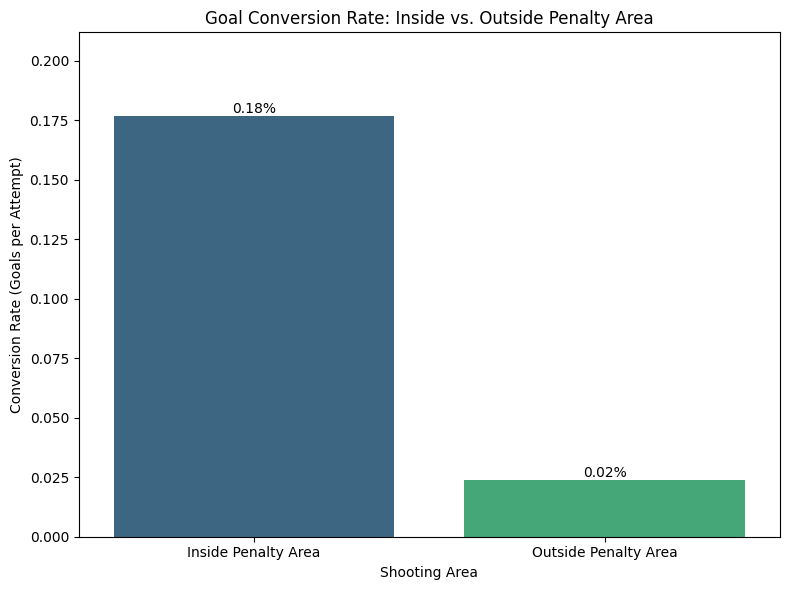


Goal Conversion Rate:
Inside Penalty Area: 17.66%
Outside Penalty Area: 2.38%


In [52]:
# bar chart for total goal conversion rate inside/outside pen area 
total_goals_inside_pa = df['goal inside the penalty area team1'].sum() + \
                        df['goal inside the penalty area team2'].sum()
total_attempts_inside_pa = df['attempts inside the penalty area team1'].sum() + \
                           df['attempts inside the penalty area  team2'].sum()

total_goals_outside_pa = df['goal outside the penalty area team1'].sum() + \
                         df['goal outside the penalty area team2'].sum()
total_attempts_outside_pa = df['attempts outside the penalty area  team1'].sum() + \
                            df['attempts outside the penalty area  team2'].sum()

conversion_rate_inside = (total_goals_inside_pa / total_attempts_inside_pa) if total_attempts_inside_pa > 0 else 0
conversion_rate_outside = (total_goals_outside_pa / total_attempts_outside_pa) if total_attempts_outside_pa > 0 else 0

conversion_data = pd.DataFrame({
    'Area': ['Inside Penalty Area', 'Outside Penalty Area'],
    'Conversion_Rate': [conversion_rate_inside, conversion_rate_outside]
})

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Area', y='Conversion_Rate', data=conversion_data, palette='viridis', hue='Area')
plt.title('Goal Conversion Rate: Inside vs. Outside Penalty Area')
plt.xlabel('Shooting Area')
plt.ylabel('Conversion Rate (Goals per Attempt)')
plt.ylim(0, max(conversion_rate_inside, conversion_rate_outside) * 1.2) 
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f%%', label_type='edge')

plt.tight_layout()
plt.show()

print("\nGoal Conversion Rate:")
print(f"Inside Penalty Area: {conversion_rate_inside:.2%}")
print(f"Outside Penalty Area: {conversion_rate_outside:.2%}")

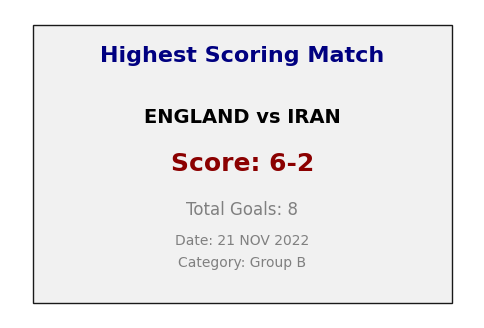

In [54]:
# highest scoring match from the dataset
total_goals = 8
team1 = "ENGLAND"
team2 = "IRAN"
goals1 = 6
goals2 = 2
match_date = "21 NOV 2022"
category = "Group B"

score_line = f"{goals1}-{goals2}"

fig, ax = plt.subplots(figsize=(6, 4)) 
# Hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

card_rect = patches.Rectangle((0.05, 0.05), 0.9, 0.9,
                              linewidth=1, edgecolor='black', facecolor='#f0f0f0', alpha=0.9,
                              transform=ax.transAxes)
ax.add_patch(card_rect)

ax.text(0.5, 0.85, 'Highest Scoring Match',
        fontsize=16, fontweight='bold', color='navy', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.65, f'{team1} vs {team2}',
        fontsize=14, fontweight='bold', color='black', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.5, f'Score: {score_line}',
        fontsize=18, fontweight='bold', color='darkred', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.35, f'Total Goals: {total_goals}',
        fontsize=12, color='gray', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.25, f'Date: {match_date}',
        fontsize=10, color='gray', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.18, f'Category: {category}',
        fontsize=10, color='gray', ha='center', va='center', transform=ax.transAxes)

plt.show()

In [56]:
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,possession team1_numeric,possession team2_numeric
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,6,5,0,0,52,72,256,279,42.0,50.0
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,8,13,0,0,63,72,139,416,72.0,19.0
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,9,15,0,0,63,73,263,251,44.0,45.0
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,7,7,0,0,81,72,242,292,51.0,39.0
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,4,14,0,0,65,80,163,361,64.0,24.0


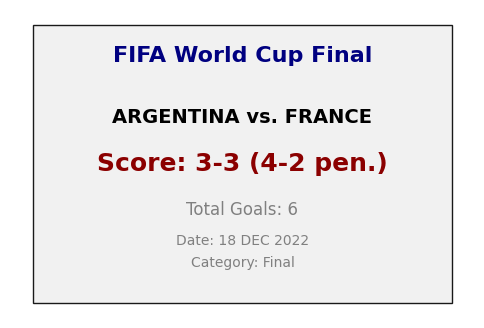

In [61]:
# info card for the final match
team1 = "ARGENTINA"
team2 = "FRANCE"
goals1 = 3
goals2 = 3
penalties1 = 4 
penalties2 = 2
total_goals = goals1 + goals2
match_date = "18 DEC 2022"
category = "Final"

score_line = f"{goals1}-{goals2}"
if penalties1 > 0 or penalties2 > 0:
    score_line += f" ({penalties1}-{penalties2} pen.)"

fig, ax = plt.subplots(figsize=(6, 4)) 
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

card_rect = patches.Rectangle((0.05, 0.05), 0.9, 0.9,
                              linewidth=1, edgecolor='black', facecolor='#f0f0f0', alpha=0.9,
                              transform=ax.transAxes)
ax.add_patch(card_rect)

ax.text(0.5, 0.85, 'FIFA World Cup Final',
        fontsize=16, fontweight='bold', color='navy', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.65, f'{team1} vs. {team2}',
        fontsize=14, fontweight='bold', color='black', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.5, f'Score: {score_line}',
        fontsize=18, fontweight='bold', color='darkred', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.35, f'Total Goals: {total_goals}',
        fontsize=12, color='gray', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.25, f'Date: {match_date}',
        fontsize=10, color='gray', ha='center', va='center', transform=ax.transAxes)

ax.text(0.5, 0.18, f'Category: {category}',
        fontsize=10, color='gray', ha='center', va='center', transform=ax.transAxes)

plt.show()

In [63]:
print("ARGENTINA🏆")

ARGENTINA🏆
